##Exploratory Data Analysis (EDA) on Tsunami dataset

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib  as mlp

%matplotlib inline

In [0]:
df1 = pd.read_csv('/content/drive/My Drive/oceans/ocean1.csv')
df2  = pd.read_csv('/content/drive/My Drive/oceans/ocean2.csv')

In [93]:
df2.shape

(58, 13)

In [94]:
print(df1.columns)
print(df2.columns)

Index(['X', 'Y', 'STATION', 'DESCRIPTION', 'LATITUDE', 'LONGITUDE', 'DEPTH',
       'DEPLOYED', 'OBJECTID', 'TYPE', 'DEPLOY_DATE', 'DATA_URL'],
      dtype='object')
Index(['x', 'y', 'station', 'description', 'latitude', 'longitude', 'depth',
       'deployed', 'objectid', 'type', 'deploy_date', 'data_url', 'location'],
      dtype='object')


In [0]:
del df1

In [96]:
df2.head()

,x,y,station,description,latitude,longitude,depth,deployed,objectid,type,deploy_date,data_url,location
0,178.263,48.948,21414,"170 NM South of Amchitka, Alaska, USA",48.948,178.263,5375,Y,1,2.6-meter discus buoy,2014-09-19T00:00:00Z,http://www.ndbc.noaa.gov/station_page.php?stat...,POINT(178.263 48.948)
1,-73.429,-20.473,32401,"260 NM West-southwest of Arica, Chile",-20.473,-73.429,4797,P,2,2.6-meter discus buoy,2014-03-12T00:00:00Z,http://www.ndbc.noaa.gov/station_page.php?stat...,POINT(-73.429 -20.473)
2,-67.320,23.496,41420,"328 NM North-northeast of Santo Domingo, Domin...",23.496,-67.320,5739,Y,3,2.6-meter discus buoy,2014-05-17T00:00:00Z,http://www.ndbc.noaa.gov/station_page.php?stat...,POINT(-67.32 23.496)
3,-63.906,23.409,41421,"300 NM North of Saint Thomas, U.S. Virgin Islands",23.409,-63.906,5845,Y,4,2.6-meter discus buoy,2014-05-18T00:00:00Z,http://www.ndbc.noaa.gov/station_page.php?stat...,POINT(-63.906 23.409)
4,-72.466,32.922,41424,"370 NM East of Charleston, South Carolina, USA",32.922,-72.466,5284,Y,5,2.6-meter discus buoy,2014-04-17T00:00:00Z,http://www.ndbc.noaa.gov/station_page.php?stat...,POINT(-72.466 32.922)


In [0]:
locs = df2['location']

In [98]:
df2 = df2.drop(['x','y','location','data_url','objectid'],axis=1)
df2.sample(1)

,station,description,latitude,longitude,depth,deployed,type,deploy_date
51,32402,"180 NM West of Caldera, Chile",-26.743,-73.983,4070,P,2.6-meter discus buoy,2013-04-02T00:00:00Z


In [0]:
df = df2

In [100]:
df.head(1)

,station,description,latitude,longitude,depth,deployed,type,deploy_date
0,21414,"170 NM South of Amchitka, Alaska, USA",48.948,178.263,5375,Y,2.6-meter discus buoy,2014-09-19T00:00:00Z


In [101]:
df.isna().any()

station        False
description    False
latitude       False
longitude      False
depth          False
deployed       False
type           False
deploy_date     True
dtype: bool

In [102]:
df[df['deploy_date'].isna()]

,station,description,latitude,longitude,depth,deployed,type,deploy_date
28,55401,"600 NM Southeast of Hobart, Tasmania",-46.922,160.562,4975,P,2.6-meter discus buoy,NaN
43,42409,"247 NM South of New Orleans, Louisiana, USA",25.867,-89.265,3282,Y,2.6-meter discus buoy,NaN


Dropping the null records

In [103]:
df.drop([28,43]).shape


(56, 8)

In [0]:
import re
locations = df['description']

###Extracting countries,cities from the 'description' column

In [0]:
cities=[]
for x in locations:
  y = re.split('of',x)
  cities.append(y[-1])
country=[]
for x in locations:
  y = re.split(',',x)
  country.append(y[-1])


In [0]:
df['country'] = country
df['city'] = cities

In [107]:
df.head()

,station,description,latitude,longitude,depth,deployed,type,deploy_date,country,city
0,21414,"170 NM South of Amchitka, Alaska, USA",48.948,178.263,5375,Y,2.6-meter discus buoy,2014-09-19T00:00:00Z,USA,"Amchitka, Alaska, USA"
1,32401,"260 NM West-southwest of Arica, Chile",-20.473,-73.429,4797,P,2.6-meter discus buoy,2014-03-12T00:00:00Z,Chile,"Arica, Chile"
2,41420,"328 NM North-northeast of Santo Domingo, Domin...",23.496,-67.320,5739,Y,2.6-meter discus buoy,2014-05-17T00:00:00Z,Dominican Republic,"Santo Domingo, Dominican Republic"
3,41421,"300 NM North of Saint Thomas, U.S. Virgin Islands",23.409,-63.906,5845,Y,2.6-meter discus buoy,2014-05-18T00:00:00Z,U.S. Virgin Islands,"Saint Thomas, U.S. Virgin Islands"
4,41424,"370 NM East of Charleston, South Carolina, USA",32.922,-72.466,5284,Y,2.6-meter discus buoy,2014-04-17T00:00:00Z,USA,"Charleston, South Carolina, USA"


In [0]:
df = df.drop(['description'],axis=1)

In [109]:
df.isna().any()

station        False
latitude       False
longitude      False
depth          False
deployed       False
type           False
deploy_date     True
country        False
city           False
dtype: bool

In [0]:
df = df.drop([28,43])

In [111]:
df.isna().any()

station        False
latitude       False
longitude      False
depth          False
deployed       False
type           False
deploy_date    False
country        False
city           False
dtype: bool

In [0]:
ncity=[]
for x in df['city'].tolist():
  y = re.split(',',x)
  ncity.append(y[0])


In [0]:
df['city'] = ncity


In [114]:
df.head()

,station,latitude,longitude,depth,deployed,type,deploy_date,country,city
0,21414,48.948,178.263,5375,Y,2.6-meter discus buoy,2014-09-19T00:00:00Z,USA,Amchitka
1,32401,-20.473,-73.429,4797,P,2.6-meter discus buoy,2014-03-12T00:00:00Z,Chile,Arica
2,41420,23.496,-67.320,5739,Y,2.6-meter discus buoy,2014-05-17T00:00:00Z,Dominican Republic,Santo Domingo
3,41421,23.409,-63.906,5845,Y,2.6-meter discus buoy,2014-05-18T00:00:00Z,U.S. Virgin Islands,Saint Thomas
4,41424,32.922,-72.466,5284,Y,2.6-meter discus buoy,2014-04-17T00:00:00Z,USA,Charleston


In [0]:
df['year']=df['deploy_date'][4][:4]

##Now the data is ready for Visualization/Story telling

In [116]:
df.head()

,station,latitude,longitude,depth,deployed,type,deploy_date,country,city,year
0,21414,48.948,178.263,5375,Y,2.6-meter discus buoy,2014-09-19T00:00:00Z,USA,Amchitka,2014
1,32401,-20.473,-73.429,4797,P,2.6-meter discus buoy,2014-03-12T00:00:00Z,Chile,Arica,2014
2,41420,23.496,-67.320,5739,Y,2.6-meter discus buoy,2014-05-17T00:00:00Z,Dominican Republic,Santo Domingo,2014
3,41421,23.409,-63.906,5845,Y,2.6-meter discus buoy,2014-05-18T00:00:00Z,U.S. Virgin Islands,Saint Thomas,2014
4,41424,32.922,-72.466,5284,Y,2.6-meter discus buoy,2014-04-17T00:00:00Z,USA,Charleston,2014


##Analyzing which countries have suffered more tsunamis

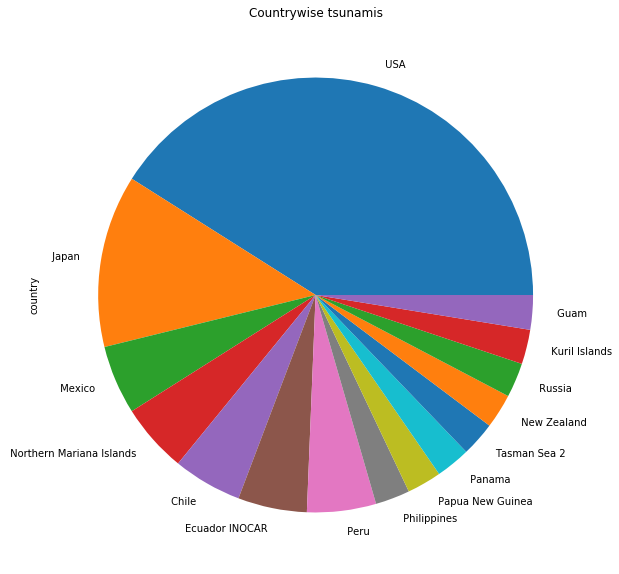

In [117]:
df.groupby(df.country)['country'].count().sort_values(ascending=False).head(15).plot(kind='pie',figsize=(15,10),
                                                                                     title="Countrywise tsunamis")
plt.show()

##A BarPlot to check the number of tsunamis

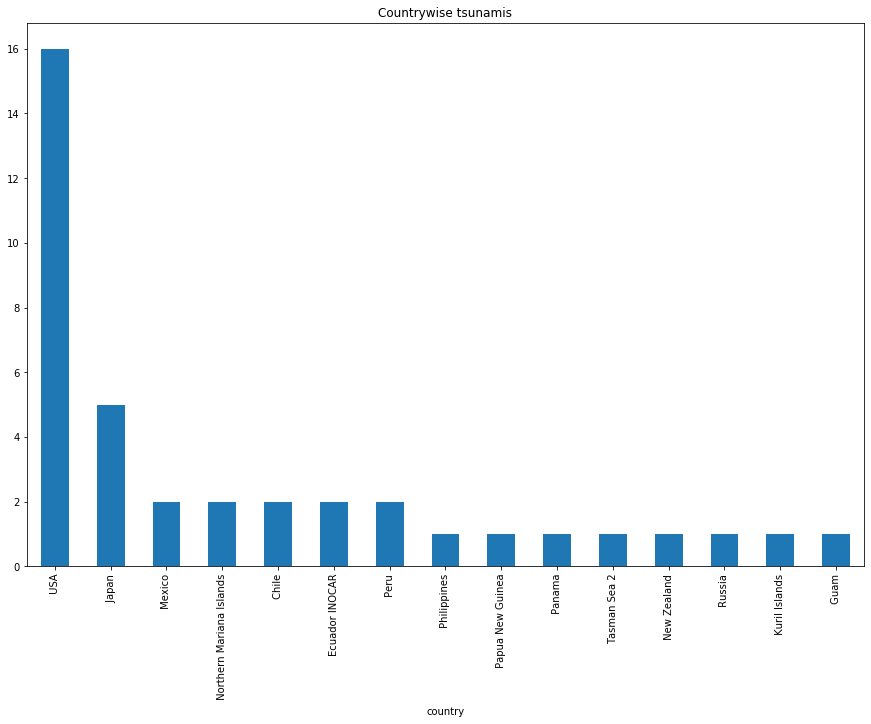

In [118]:
df.groupby(df.country)['country'].count().sort_values(ascending=False).head(15).plot(kind='bar',figsize=(15,10),
                                                                                     title="Countrywise tsunamis")

##We will dive deeper to check which country has seen the deepest tsunami

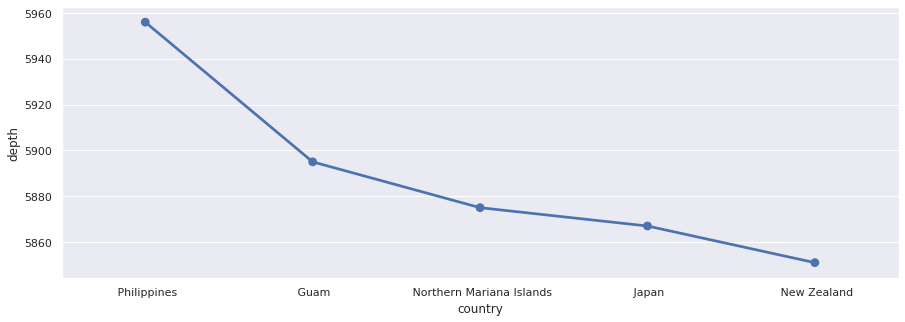

In [133]:

df_sorted_by_depths = df.sort_values(by='depth',ascending=False)

sns.pointplot(x=df_sorted_by_depths['country'].head(5)
              ,y=df_sorted_by_depths['depth']
              ,data=df_sorted_by_depths)

sns.set(rc={'figure.figsize':(15,15)})

In [158]:
df[df.depth==max(df.depth)]['country']

23     Philippines
Name: country, dtype: object

##Phillipines has seen the deepest tsunamis' of them all

In [144]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'poin

##Visulaizing which city in US saw the deepest tsunami

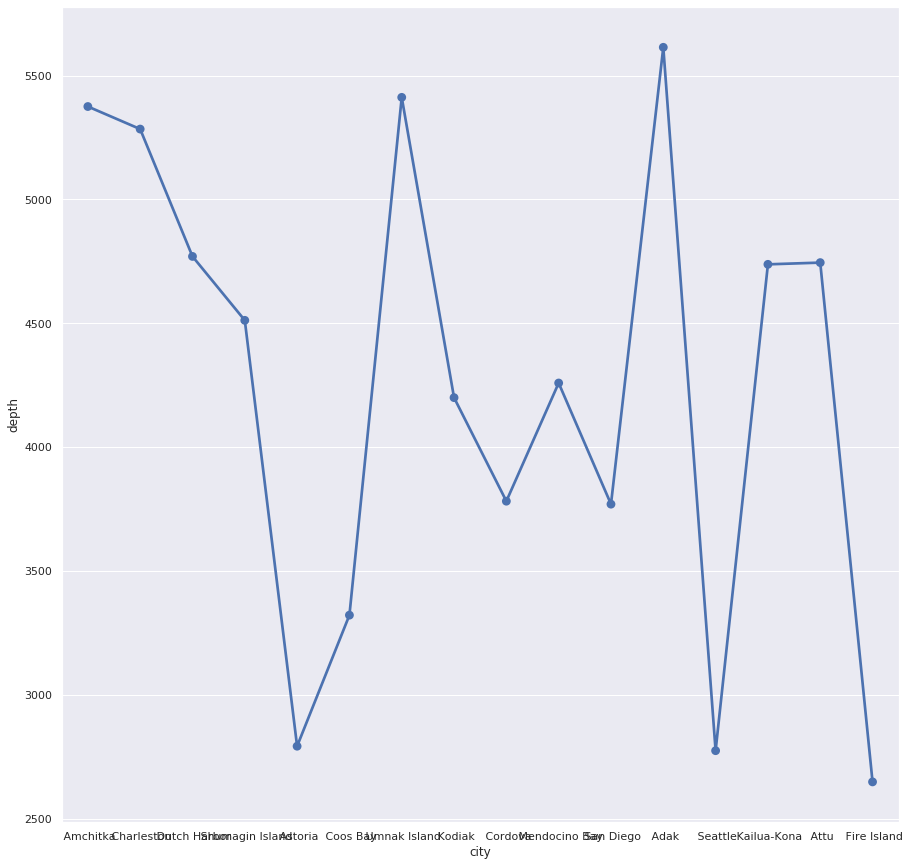

In [146]:
sns.pointplot(x=df.loc[df.country==' USA']['city'],y=df.depth,data=df,fit_reg=False)

##Analyzing which city is most prone to be affected by tsunamis'

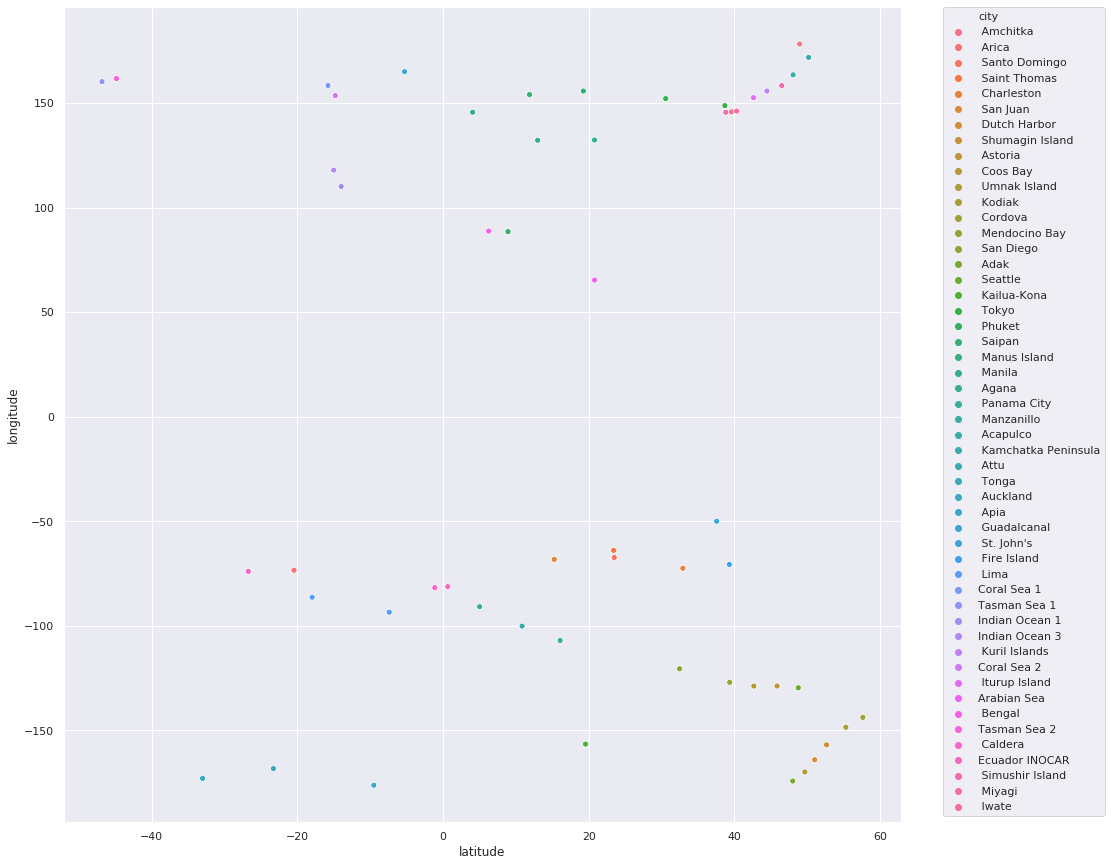

In [154]:
sns.scatterplot(x='latitude',y='longitude',data=df,hue=df.city)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [157]:
df['city'].value_counts().head(5)

 Iwate            2
 Lima             2
 Saipan           2
Ecuador INOCAR    2
 Tokyo            2
Name: city, dtype: int64

------------------------------------------------------------------------------------------END--------------------------------------------------------------------



